# Implementation exercise: Linear Classification

In [31]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
%matplotlib inline  

### Some helper functions for visualisation

In [32]:
def plot_decision_boundary(X, Z, W=None, b=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X[:,0], X[:,1], c=Z, cmap=plt.cm.cool)
    ax.set_autoscale_on(False)

    a = - W[0, 0] / W[0, 1]
    xx = np.linspace(-30, 30)
    yy = a * xx - (b[0]) / W[0, 1]

    ax.plot(xx, yy, 'k-', c=plt.cm.cool(1.0/3.0))

### Dataset Loader

In [33]:
def loadDataset(split, X=[] , XT=[], Z = [], ZT = []):
    dataset = datasets.load_iris()
    c = list(zip(dataset['data'], dataset['target']))
    np.random.seed(224)
    np.random.shuffle(c)
    x, t = zip(*c)
    sp = int(split*len(c))
    #sp = 3
    X = x[:sp]
    XT = x[sp:]
    Z = t[:sp]
    ZT = t[sp:]
    names = ['Sepal. length', 'Sepal. width', 'Petal. length', 'Petal. width']
    return np.array(X), np.array(XT), np.array(Z), np.array(ZT), names

In [34]:
# prepare data
split = 0.67
X, XT, Z, ZT, names = loadDataset(split)

# combine two of the 3 classes for a 2 class problem
Z[Z==2] = 1
ZT[ZT==2] = 1

# only look at 2 dimensions of the input data for easy visualisation
X = X[:,:2]
XT = XT[:,:2]

## Exercise 1: Calculate probability of class 1
Compute the probability of class 1 given the data and the parameters.

arguments:
* *X*: data
* *W*: weight matrix, part of the parameters
* *b*: bias, part of the parameters

returns:
* *rate*: probabiliy of the predicted class 1

In [35]:
def pred(X, W, b):
    result = []
    for x in X:
        a = 0.0 + b
        a += W[0].dot(x)
        result.append(1.0 / (1.0 + np.exp(-a)))
    return result

## Exercise 2: Calculate the log-likelihood given the target
Compute the logarithm of the likelihood for logistic regression. The negative log-likelihood is our loss function.

arguments:
* *X*: data
* *Z*: target
* *W*: weight matrix, part of the parameters
* *b*: bias, part of the parameters

returns:
* *log likelihood*: logarithm of the likelihood

In [36]:
def loglikelihood(X, Z, W, b):
    result = []
    p = pred(X, W, b)
    for i in xrange(len(p)):
        result.append(Z[i]*np.log(p[i])+(1-Z[i])*np.log(1-p[i]))
    return np.array(result)

## Exercise 3: Implement the gradient of the loss/log-likelihood
Compute the gradient of the loss with respect to the parameters

arguments:
* *X*: data
* *Z*: target
* *W*: weight matrix, part of the parameters
* *b*: bias, part of the parameters

returns:
* *dLdW*: gradient of loss wrt to W
* *dLdb*: gradient of loss wrt to b

In [37]:
def grad(X, Z, W, b):
    resultW = [0.0, 0.0]
    resultb = 0.0
    p = pred(X, W, b)
    for i in xrange(len(X)):
        mul = p[i]-Z[i]
        #print "mul : ", mul
        resultW += mul*X[i]
        resultb += mul
    return np.array(resultW), np.array(resultb)

## Exercise 4: Test everything
Run the provied simple gradient descent algorithm to optimize the model parameters and plot the resuling decision boundary.

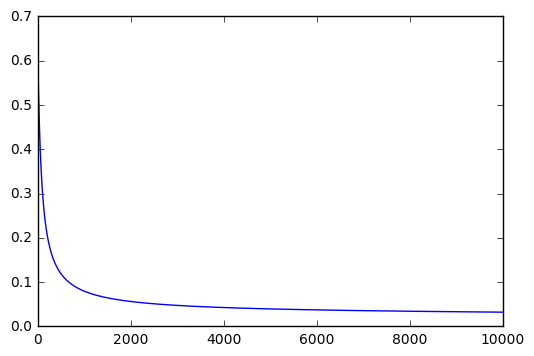

In [38]:
W = np.random.randn(1,2) * 0.01
b = np.random.randn(1) * 0.01

learning_rate = 0.001
train_loss = []
validation_loss = []
#print X
#print Z
for i in range(10000):
    dLdW, dLdb = grad(X, Z, W, b)
    W -= learning_rate * dLdW
    b -= learning_rate * dLdb
    #print W
    #print b
    #plot(X, W, b)
    train_loss.append( -loglikelihood(X, Z, W, b).mean())

#print train_loss[-1]
_ = plt.plot(train_loss)

### Decision boundary on the training set

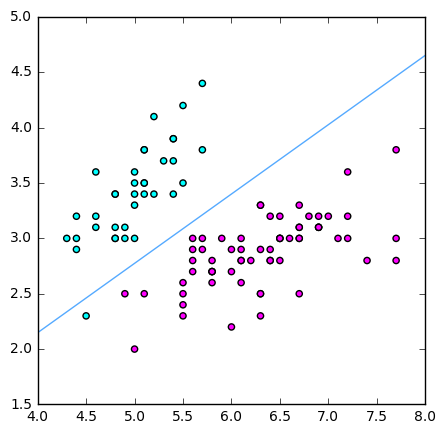

In [39]:
plot_decision_boundary(X, Z, W=W, b=b)

### Decision boundary on the test set

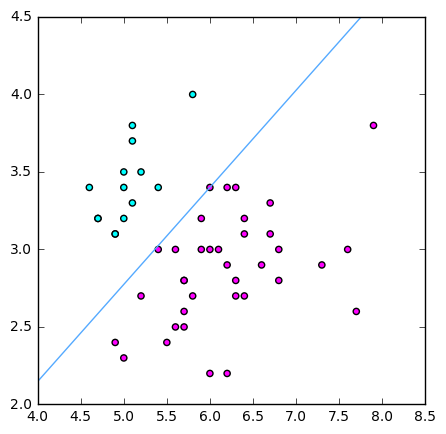

In [40]:
plot_decision_boundary(XT, ZT, W=W, b=b)